# Toxic Comment Classification on Social Media website


 

#### Project Objective
Humans have developed diverse models for communicating their thoughts through a lot of devices. The internet has been a boon for so many years. But nowadays individuals are found to be at the other end of rising levels of Cyberbullying or social media abuse. Racism, Hate, Casteism in the comments sections of social media posts have many people disgusted and alarmed. To create a safe environment for all the people on the Internet, social media companies need to filter, block, and takedown offensive posts. Enhancement to the existing model will ideally lead to more constructive and respectful online discussion. </p>

#### Dataset Description
It's important to recognize and exclude malicious content from public platforms. Human moderators can't analyze a large corpus of comments. Our strategy is to implement Natural Language Processing (NLP) techniques to build a rapid and robust method for detecting online toxicity. We are using Google AI Jigsaw Dataset for Toxic Comment classification. We'll create a multi-label model for detecting different types of social media abuse.

#### Dataset link-https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

#### Models worked on

1. Linear SVC
8. LSTM


In [ ]:
#importing all the libraries need to implement the models


import pandas as pd #to reached the dataset in the form of dataframe
import numpy as np #to perform mathematical operations
import re
import string
from nltk.corpus import stopwords #this package containd list of stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
import keras
from keras.layers import Dense, LSTM, Embedding, Input
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer #importing the vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
import seaborn as sns
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Reading the data.

In [ ]:
comment_train = pd.read_csv("train.csv")

comment_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### Data type of each fields.

In [ ]:
comment_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
comment_test = pd.read_csv("test.csv") #reading test dataset
comment_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
df_toxic_category = comment_train.drop(['id', 'comment_text'], axis=1) #different labels of toxic
df_toxic_category

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


### Data visualisation and analysis.


In [ ]:
comment_train.describe() #it gives informations like mean,std, no of rows etc

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


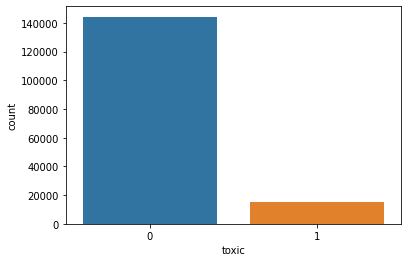

In [ ]:
sns.countplot(df_toxic_category['toxic'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


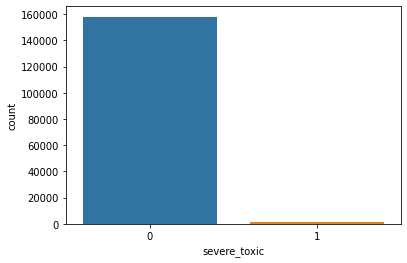

In [ ]:
sns.countplot(df_toxic_category['severe_toxic'])

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


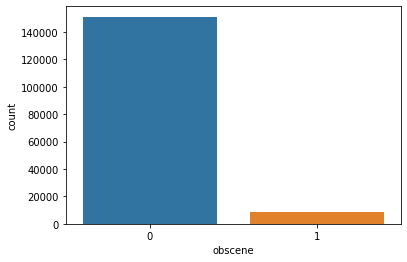

In [ ]:
print(sns.countplot(df_toxic_category['obscene']))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


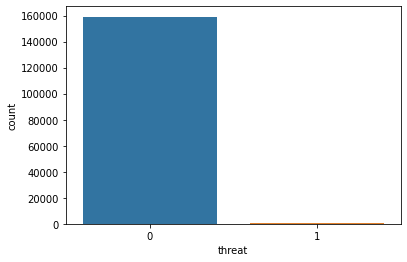

In [ ]:
print(sns.countplot(df_toxic_category['threat']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


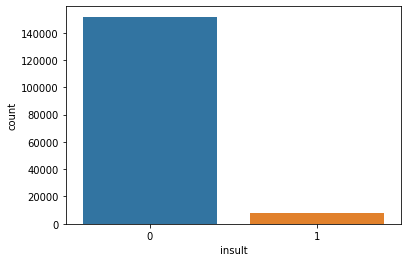

In [ ]:
print(sns.countplot(df_toxic_category['insult']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


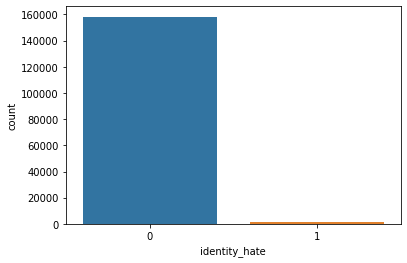

In [ ]:
print(sns.countplot(df_toxic_category['identity_hate']))

From above visualization we can say that most of the values in each of the labels are zero's.

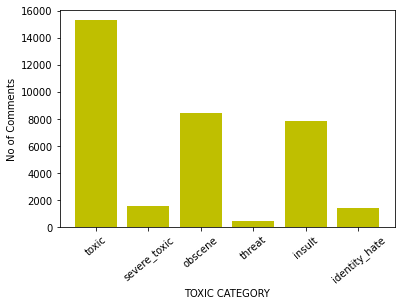

In [ ]:
# generating the bar graph to compare the count of each labels
Toxic = df_toxic_category
ValueCounts = []
subdivisions  = list(Toxic.columns.values)
for f in subdivisions:
    ValueCounts.append((f, Toxic[f].sum()))
ValueCounts
lab=[] #empty list to store the labels of dataset
val=[] #empty list to store the count of the values
for i in ValueCounts:
    lab.append(i[0])
    val.append(i[1])

plt.bar(lab,val,color='y')
plt.xticks(rotation=40)
plt.xlabel("TOXIC CATEGORY")
plt.ylabel("No of Comments")
plt.show()

In [ ]:
num_rows = len(comment_train)
print(num_rows) 
sum_tox = comment_train['toxic'].sum() / num_rows * 100
sum_sev = comment_train['severe_toxic'].sum() / num_rows * 100
sum_obs = comment_train['obscene'].sum() / num_rows * 100
sum_thr = comment_train['threat'].sum() / num_rows * 100
sum_ins = comment_train['insult'].sum() / num_rows * 100
sum_ide = comment_train['identity_hate'].sum() / num_rows * 100

159571


In [ ]:
ind = np.arange(6)

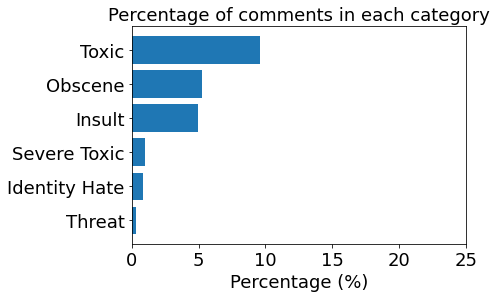

In [ ]:
# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.

# Sequence of % have been sorted manually.

ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=18)
plt.xticks(np.arange(0, 30, 5), size=18)
plt.title('Percentage of comments in each category', size=18)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=18)

# Inverting the graph in descending order

plt.gca().invert_yaxis()
plt.show()


From the graph above we can clearly see that our dataset set is imbalanced. We need to make our dataset balanced so that our model does not overfit the data. Firstly, lets try and run the model without performing any balancing operations on the dataset.

In [ ]:
# Useful to show the words which occur most frequently for each category

import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

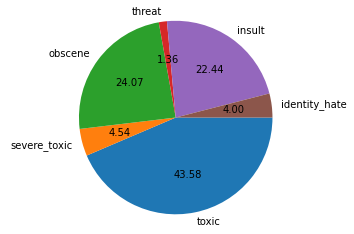

In [ ]:
plt.pie(val,labels=lab,autopct='%.2f',counterclock=False)
plt.axis('equal')
plt.show()

In [ ]:
cols=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

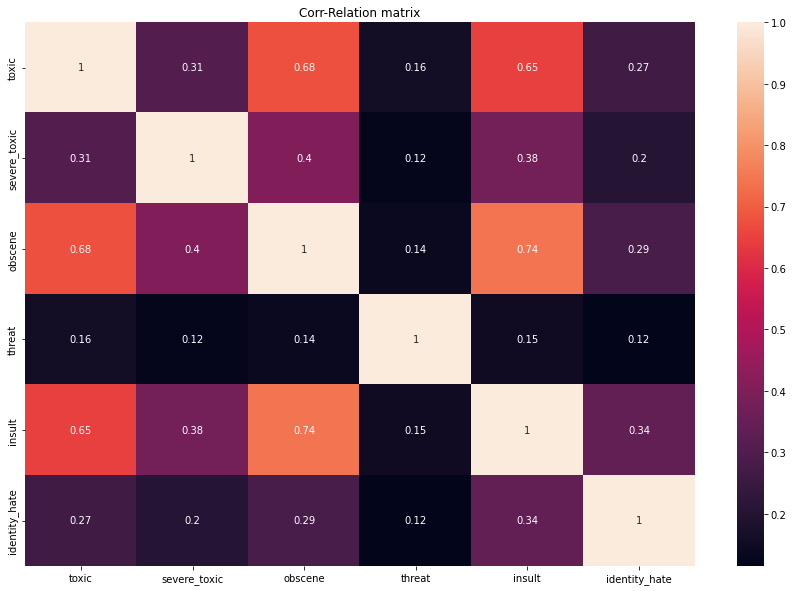

In [ ]:
#defining co-relation matrix
data_category = df_toxic_category
co_relation_matrix = data_category.corr()

plt.figure(figsize=(15,10))
plt.title("Corr-Relation matrix")
sns.heatmap(co_relation_matrix,annot=True) 

plt.show()

From the above matrix we can observe that obscene and insult both have similar kind of values and they are highly related to each others.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


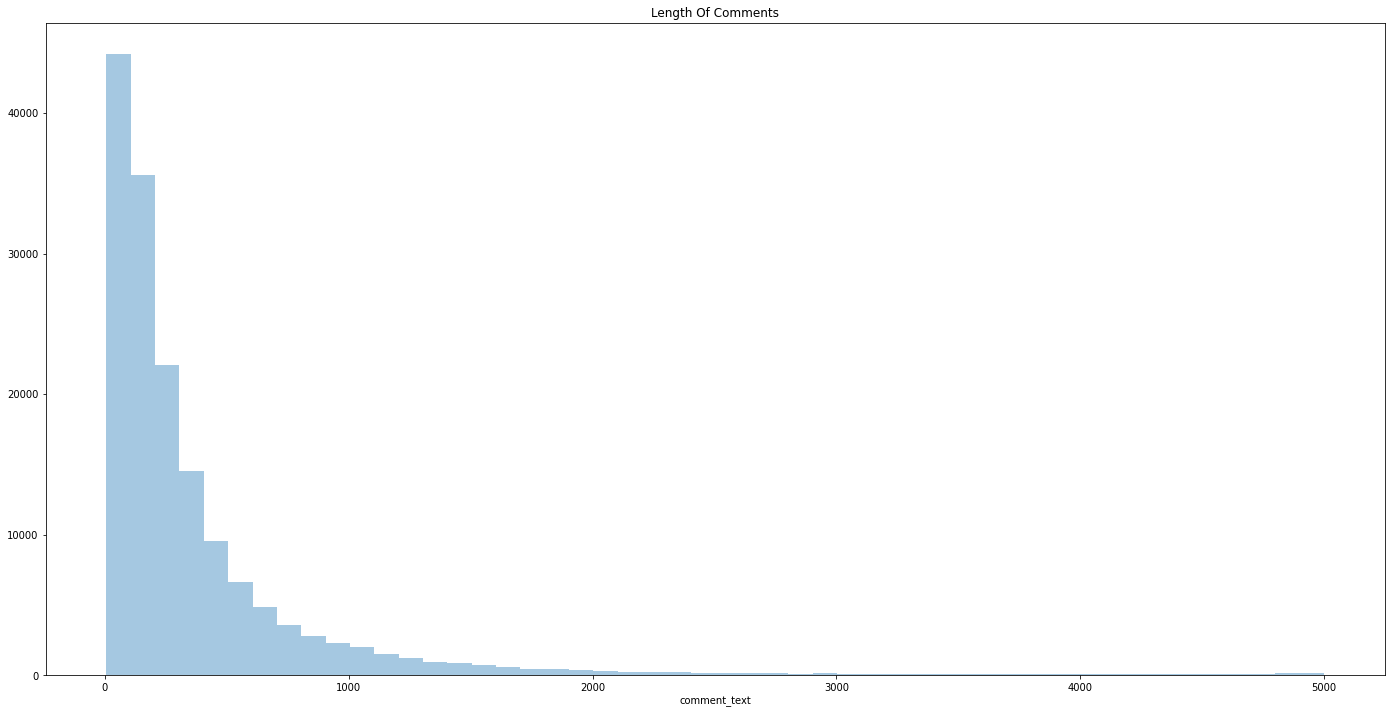

In [ ]:
plt.figure(figsize = (24,12))
sns.distplot(comment_train["comment_text"].apply(lambda x : len(x)),kde=False)
plt.title("Length Of Comments")
plt.show()

# Pre-processing the data.

Data preprocessing involves removing unwanted symbols, stop words, puntuations, annotations and for this pre-processing approach I am using lemmatization for lemmatizing the words. For all this cleaning operations I have created seprated function and I am passing my train and test data to this function and creating new column in the dataframe for the clean text.

In [ ]:
import nltk #importing nltk.
nltk.download('stopwords') #downlaoding the stopwords.
stop = stopwords.words('english') #As our training dataset is in only one language I am only importing the english stopwords.
puncutations = string.punctuation #From string package we can retrieve the list of puntuations using string.punctuation.
stop = stop + list(puncutations) #adding the list of puntautions on the array we created for stop words.
stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Removing annotation.

In [ ]:
def annotation(data_text):
    annotation_sentence = re.sub('[^a-z A-Z]+', ' ', data_text)
    return annotation_sentence

In [ ]:
"""
Making the sentences to lowercase so that it can be passed in lemmetizing and stopwords removal function
"""
def lower(data_text):
    lower_sentence = data_text.lower()
    return lower_sentence

# Lemmatiztion.

Lemmatizing the words and joining them to return in the form of sentences. 


In [ ]:
def lem(data_text):
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(d, 'v') for d in data_text.split()] #tokkenizing the words
    lem_sentence=' '.join(lem_words)
    return lem_sentence

# Removing the stop words and puntuations.

In [ ]:
"""

From  string package list of punctuation can be extracted. After extracting the list of punctuation I have added it to the list 
of stop words so that after each and every iteration I can remove stop words and punctuation together.

"""
def stop_words_removal_puntuations(data_text):
    stop = list(set(stopwords.words('english')))
    puncutations = string.punctuation
    stop = stop + list(puncutations)
    stop_count=[d for d in data_text.split() if d not in stop]
    #print(stop_count)
    stop_count_sentence = ' '.join(stop_count)
    return stop_count_sentence

# Calling all the above funtion.

In [ ]:
"""
This function will call all the above function one by one for cleaning data.
"""
def preprocessing_text(sentence):
    processed_sentence = annotation(sentence)
    processed_sentence = lower(processed_sentence)
    processed_sentence = lem(processed_sentence)
    processed_sentence = stop_words_removal_puntuations(processed_sentence)
    
    return processed_sentence

In [ ]:
def cleaning(data):
    text_data=preprocessing_text(data)
    return text_data

In [ ]:
comment_train['Cleaned_data'] = comment_train['comment_text'].apply(cleaning) # passing training dataset in cleaning function

In [ ]:
comment_train[0:5]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_data
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edit make username hardcore metall...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stick th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestions improvement wonder secti...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page


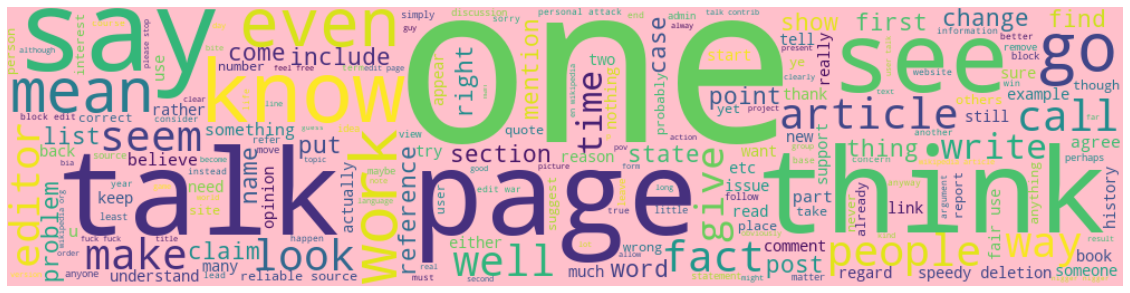

In [ ]:
#
words = ' '.join([k for k in comment_train['Cleaned_data']])
W_C = WordCloud(width=1000, height=250, random_state=31, max_font_size=200,background_color='pink').generate(words)

plt.figure(figsize=(20,8))
plt.imshow(W_C, interpolation="bilinear")
plt.axis('off')
plt.show()

## Cleaning the test dataset.

In [ ]:
comment_test['Cleaned_data'] = comment_test['comment_text'].apply(cleaning)

In [ ]:
comment_test

,id,comment_text,Cleaned_data
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hat sad ...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information update correct fo...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit article
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",totally agree stuff nothing long crap
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw field home plate get faster throw cut ma...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories see change agree cor...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one found nations eu germany law return quite ...


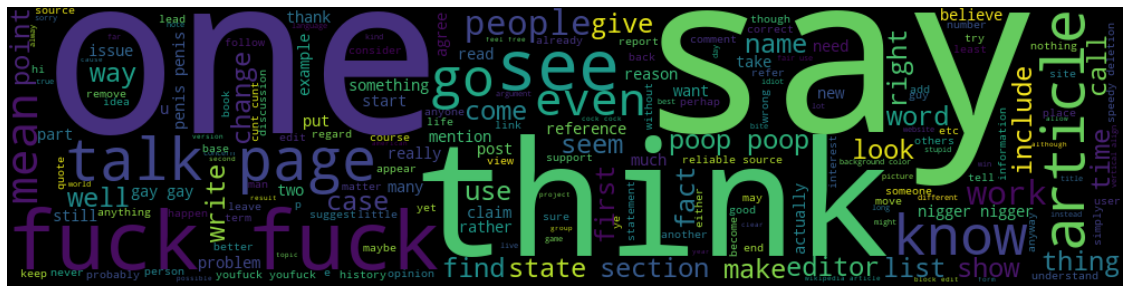

In [ ]:
words = ' '.join([k for k in comment_test['Cleaned_data']])
W_C = WordCloud(width=1000, height=250, random_state=31, max_font_size=200).generate(words)

plt.figure(figsize=(20,8))
plt.imshow(W_C, interpolation="bilinear")
plt.axis('off')
plt.show()

I am removing this column as our model is giving more preference to this columns and removing this column might help us to get better results

In [ ]:
# Here I have used tf_idf beacause our model performs in a same way  in both the vectorizing technique. And using TF_IDF gave me f1-score of 0.66 however countvectorizer gave me fi-score of 0.64
tf_idf = TfidfVectorizer(analyzer='word', max_features=40000, ngram_range=(1,2), stop_words='english') #here i am considering max-features as 40000 and passing bi-gram model 
X = tf_idf.fit_transform(comment_train['Cleaned_data'])
X

<159571x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 4480696 stored elements in Compressed Sparse Row format>

In [ ]:
name_of_features=tf_idf.get_feature_names()
name_of_features[0:50] #getting list of features.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aap',
 'aardvark',
 'aaron',
 'ab',
 'aba',
 'abandon',
 'abandonment',
 'abbas',
 'abbey',
 'abbott',
 'abbreviate',
 'abbreviation',
 'abbreviations',
 'abc',
 'abc news',
 'abd',
 'abduct',
 'abduction',
 'abdul',
 'abdullah',
 'abe',
 'abhira',
 'abhiras',
 'abhishek',
 'abhorrent',
 'abide',
 'abide wikipedia',
 'abilities',
 'ability',
 'ability create',
 'ability edit',
 'ability rename',
 'abit',
 'abkhazia',
 'able',
 'able add',
 'able block',
 'able change',
 'able check',
 'able come',
 'able contribute',
 'able edit',
 'able help',
 'able look',
 'able make',
 'able post',
 'able provide',
 'able read',
 'able stand']

In [ ]:
y=comment_train.drop(['id', 'comment_text','Cleaned_data'], axis=1)
y.drop(['toxic'], axis=1, inplace=True)
y

,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
159566,0,0,0,0,0
159567,0,0,0,0,0
159568,0,0,0,0,0
159569,0,0,0,0,0


In [ ]:
"""
train-75%
test-25%
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

# LinearSVC 

In [ ]:
svc = LinearSVC() #creating object for linear SVC

In [ ]:
clf = OneVsRestClassifier(svc) 

In [ ]:
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=LinearSVC())

In [ ]:
svc_pred= clf.predict(X_test)
svc_pred

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
cm_svc=confusion_matrix(y_test.values.argmax(axis=1),svc_pred.argmax(axis=1))
cm_svc

array([[37101,   441,     6,   110,    29],
       [  558,  1045,     2,    74,     4],
       [   29,     1,     9,     2,     0],
       [  319,    38,     0,    69,     4],
       [   42,     1,     0,     2,     7]])

In [ ]:
print(classification_report(svc_pred.argmax(axis=1),y_test.values.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     38049
           1       0.62      0.68      0.65      1526
           2       0.22      0.53      0.31        17
           3       0.16      0.27      0.20       257
           4       0.13      0.16      0.15        44

    accuracy                           0.96     39893
   macro avg       0.42      0.52      0.46     39893
weighted avg       0.96      0.96      0.96     39893



In [ ]:
accuracy_svc_pred=accuracy_score(y_test.values.argmax(axis=1),svc_pred.argmax(axis=1))
accuracy_svc_pred

0.9583385556363272

In [ ]:
print("f1_score:",f1_score(y_test,svc_pred, average="micro"))

f1_score: 0.6649988086728615


In [ ]:
data_tr = comment_train["Cleaned_data"]
data_ts = comment_test["Cleaned_data"]
train_categories=comment_train[cols]

In [ ]:
train_categories
#train_categories.drop(['toxic'], axis=1, inplace=True)
train_categories

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
tokken=Tokenizer(num_words = 20000) 

In [ ]:
tr_final = tokken.texts_to_sequences(data_tr)
ts_final = tokken.texts_to_sequences(data_ts)

In [ ]:
max_len=150

tr_padded =pad_sequences(tr_final, maxlen=max_len)
ts_padded =pad_sequences(ts_final, maxlen=max_len)
print(tr_padded.shape)
print(ts_padded.shape)

(159571, 150)
(153164, 150)


In [ ]:
model = Sequential()
model.add(Embedding(20000, 64))
model.add(LSTM(units = 32, dropout = 0.1,return_sequences=True))
model.add(LSTM(units = 32, dropout = 0.1))
model.add(Dense(units = 6, activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1280000   
                                                                 
 lstm (LSTM)                 (None, None, 32)          12416     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 1,300,934
Trainable params: 1,300,934
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = 'Adam', metrics = ["accuracy"])
x_train, x_test, y_train, y_test = train_test_split(tr_padded, train_categories, shuffle = True)
model3_LSTM=model.fit(x_train, y_train, batch_size = 100, epochs = 2, validation_data = (x_test, y_test))

Epoch 1/2
1197/1197 [==============================] - 272s 223ms/step - loss: 0.3465 - accuracy: 0.9891 - val_loss: 0.3517 - val_accuracy: 0.9943
Epoch 2/2
1197/1197 [==============================] - 266s 222ms/step - loss: 0.4108 - accuracy: 0.9941 - val_loss: 0.4670 - val_accuracy: 0.9943


Using categorical_crossentropy as the loss function our model is overfitting as the categorical_crossentropy assumes the sum of probability of all the classes is 1. This happens in the case of multiclass where 1 sample as 1 class. But our model is multilabel that may be the reason our model is overfitting.

In [ ]:
pred = model.predict(ts_padded) #testing the model on testing dataset

4787/4787 [==============================] - 150s 31ms/step


In [ ]:
pred


array([[1.3732485, 0.2043788, 0.781318 , 0.       , 0.7189054, 0.       ],
       [1.3732485, 0.2043788, 0.781318 , 0.       , 0.7189054, 0.       ],
       [1.3732485, 0.2043788, 0.781318 , 0.       , 0.7189054, 0.       ],
       ...,
       [1.3732485, 0.2043788, 0.781318 , 0.       , 0.7189054, 0.       ],
       [1.3732485, 0.2043788, 0.781318 , 0.       , 0.7189054, 0.       ],
       [1.3732485, 0.2043788, 0.781318 , 0.       , 0.7189054, 0.       ]],
      dtype=float32)

In [ ]:
target_cols = np.array(cols)
final_predict_test = pd.concat([pd.DataFrame(pred, columns=target_cols)], 1)
test_id = comment_test['id']
Comment=comment_test.Cleaned_data
final_predict_test = pd.concat([test_id,Comment,final_predict_test],1)
final_predict_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """


,id,Cleaned_data,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hat sad ...,1.373248,0.204379,0.781318,0.0,0.718905,0.0
1,0000247867823ef7,rfc title fine imo,1.373248,0.204379,0.781318,0.0,0.718905,0.0
2,00013b17ad220c46,source zawe ashton lapland,1.373248,0.204379,0.781318,0.0,0.718905,0.0
3,00017563c3f7919a,look back source information update correct fo...,1.373248,0.204379,0.781318,0.0,0.718905,0.0
4,00017695ad8997eb,anonymously edit article,1.373248,0.204379,0.781318,0.0,0.718905,0.0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,1.373248,0.204379,0.781318,0.0,0.718905,0.0
153160,fffd7a9a6eb32c16,throw field home plate get faster throw cut ma...,1.373248,0.204379,0.781318,0.0,0.718905,0.0
153161,fffda9e8d6fafa9e,okinotorishima categories see change agree cor...,1.373248,0.204379,0.781318,0.0,0.718905,0.0
153162,fffe8f1340a79fc2,one found nations eu germany law return quite ...,1.373248,0.204379,0.781318,0.0,0.718905,0.0


In [ ]:
model = Sequential() 
model.add(Embedding(40000, 128))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid')) #here I have changed the activation layer from softmax to sigmoidal
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         5120000   
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          49408     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 5,202,822
Trainable params: 5,202,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
x_train, x_test, y_train, y_test = train_test_split(tr_padded, train_categories, shuffle = True, random_state = 123)
model3_lstm2=model.fit(x_train, y_train, batch_size = 32, epochs = 4, validation_data = (x_test, y_test))

Epoch 1/4
3740/3740 [==============================] - 1019s 271ms/step - loss: 0.1437 - auc: 0.7454 - val_loss: 0.1394 - val_auc: 0.7471
Epoch 2/4
3740/3740 [==============================] - 1006s 269ms/step - loss: 0.1420 - auc: 0.7499 - val_loss: 0.1393 - val_auc: 0.7471
Epoch 3/4
3740/3740 [==============================] - 1003s 268ms/step - loss: 0.1420 - auc: 0.7490 - val_loss: 0.1394 - val_auc: 0.7471
Epoch 4/4
3740/3740 [==============================] - 1009s 270ms/step - loss: 0.1421 - auc: 0.7485 - val_loss: 0.1392 - val_auc: 0.7492


dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


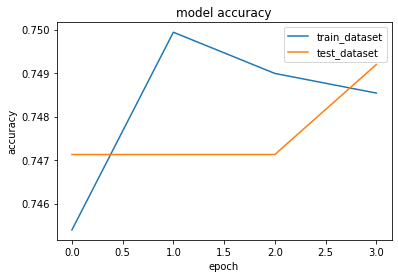

In [ ]:
print(model3_lstm2.history.keys())
plt.plot(model3_lstm2.history['auc'])
plt.plot(model3_lstm2.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_dataset', 'test_dataset'])
plt.show()

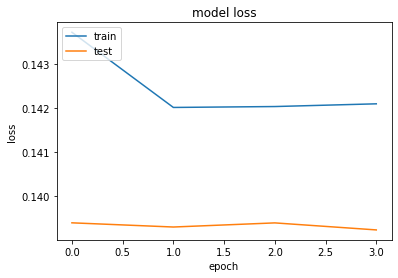

In [ ]:
plt.plot(model3_lstm2.history['loss'])
plt.plot(model3_lstm2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Parameter Tuning

In [ ]:
tokken=Tokenizer(num_words = 40000)  #increased the number of words
tokken.fit_on_texts(data_tr)
tr_final = tokken.texts_to_sequences(data_tr)
ts_final = tokken.texts_to_sequences(data_ts)

In [ ]:
#sequece padding
tr_padded =pad_sequences(tr_final, maxlen=150)
ts_padded =pad_sequences(ts_final, maxlen=150)
print(tr_padded.shape)
print(ts_padded.shape)

(159571, 150)
(153164, 150)


In [ ]:
model = Sequential() 
model.add(Embedding(40000, 128))
model.add(LSTM(units = 64, dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 64, dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid')) #here I have changed the activation layer from softmax to sigmoidal
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         5120000   
                                                                 
 lstm_4 (LSTM)               (None, None, 64)          49408     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 5,202,822
Trainable params: 5,202,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])
x_train, x_test, y_train, y_test = train_test_split(tr_padded, train_categories, shuffle = True, random_state = 123)
model3_lstm3=model.fit(x_train, y_train, batch_size = 32, epochs = 3, validation_data = (x_test, y_test))

Epoch 1/3
3740/3740 [==============================] - 989s 263ms/step - loss: 0.0685 - auc: 0.9614 - val_loss: 0.0514 - val_auc: 0.9828
Epoch 2/3
3740/3740 [==============================] - 984s 263ms/step - loss: 0.0463 - auc: 0.9836 - val_loss: 0.0471 - val_auc: 0.9788
Epoch 3/3
3740/3740 [==============================] - 989s 264ms/step - loss: 0.0409 - auc: 0.9877 - val_loss: 0.0483 - val_auc: 0.9769


After hyperparameter tuning our model is giving accuracy of .97 which is highest among all the single dense layer LSTM I have implemented above

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


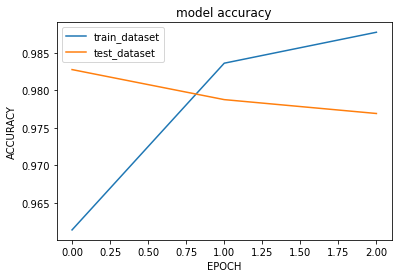

In [ ]:
print(model3_lstm3.history.keys())
plt.plot(model3_lstm3.history['auc'])
plt.plot(model3_lstm3.history['val_auc'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('model accuracy')
plt.legend(['train_dataset', 'test_dataset'])
plt.show()

In [ ]:
print(model3_lstm3.history['val_auc'])

[0.98276686668396, 0.978763222694397, 0.9769136905670166]


In [ ]:
lstm_accuracy=model3_lstm3.history['val_auc'][2:]
lstm_accuracy[0]

0.9769136905670166

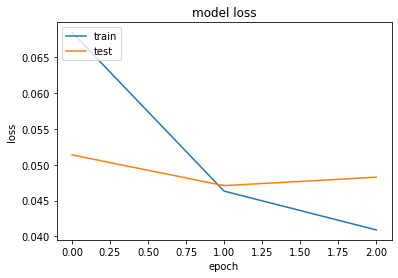

In [ ]:
plt.plot(model3_lstm3.history['loss'])
plt.plot(model3_lstm3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(ts_padded) #testing the model on testing dataset
pred

4787/4787 [==============================] - 248s 52ms/step


array([[9.91312385e-01, 2.35536397e-01, 9.43965971e-01, 7.03674778e-02,
        7.56082714e-01, 1.32556424e-01],
       [5.01477451e-04, 3.99823364e-07, 1.50424050e-04, 1.02083795e-05,
        1.16031049e-04, 4.06361760e-05],
       [1.16488701e-02, 1.75523201e-05, 1.72991736e-03, 4.43592086e-04,
        2.58897524e-03, 9.57936805e-04],
       ...,
       [3.62129940e-04, 4.42348465e-07, 1.26949177e-04, 7.49192850e-06,
        8.91802047e-05, 3.56682940e-05],
       [4.97613684e-04, 5.59082707e-07, 1.58684183e-04, 8.53179336e-06,
        9.81841877e-05, 4.31213230e-05],
       [9.71704841e-01, 2.10687518e-02, 8.04315031e-01, 1.60635840e-02,
        6.28621817e-01, 6.04815632e-02]], dtype=float32)

In [ ]:
target_cols = np.array(cols)
final_predict_test = pd.concat([pd.DataFrame(pred, columns=target_cols)], 1)
test_id = comment_test['id']
Comment=comment_test.Cleaned_data
final_predict_test = pd.concat([test_id,Comment,final_predict_test],1)
final_predict_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """


,id,Cleaned_data,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hat sad ...,0.991312,2.355364e-01,0.943966,0.070367,0.756083,0.132556
1,0000247867823ef7,rfc title fine imo,0.000501,3.998234e-07,0.000150,0.000010,0.000116,0.000041
2,00013b17ad220c46,source zawe ashton lapland,0.011649,1.755232e-05,0.001730,0.000444,0.002589,0.000958
3,00017563c3f7919a,look back source information update correct fo...,0.000461,4.717963e-07,0.000146,0.000008,0.000095,0.000039
4,00017695ad8997eb,anonymously edit article,0.001340,1.080296e-06,0.000292,0.000032,0.000280,0.000102
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,0.595725,2.225959e-03,0.123329,0.005878,0.152557,0.020960
153160,fffd7a9a6eb32c16,throw field home plate get faster throw cut ma...,0.002240,2.616361e-06,0.000485,0.000039,0.000355,0.000163
153161,fffda9e8d6fafa9e,okinotorishima categories see change agree cor...,0.000362,4.423485e-07,0.000127,0.000007,0.000089,0.000036
153162,fffe8f1340a79fc2,one found nations eu germany law return quite ...,0.000498,5.590827e-07,0.000159,0.000009,0.000098,0.000043


## Conclusion

In Closing, the sklearn.pipeline was imported from the Sklearn library to streamline the process of Text Classification to the project. From the models implemented in the project, the Linear SVC was the best model based on the accuracy of each model was given.